# Table of Contents

### Module 1
- How will the course work?
- Quantum Circuits
- Creating Superposition and Entanglement
- Getting State information
- Visualisation tools for States
- Unitaries

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

As we all hear again and again, the power of quantum computing comes from superposition and entanglement. Thus, it makes sense to have our first circuits create superposition and entanglement. To keep things simple, let’s start with 2 qubits:

- The way we do this in Qiskit is to define a QuantumCircuit object
- We can either directly give it an integer or we could explicitly specify quantum and classical registers

In [2]:
qc = QuantumCircuit(2)
qc.draw()

q_0: 
     
q_1:

In [3]:
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)

In [4]:
qc = QuantumCircuit(qreg, creg)
qc.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

Apply Hadamard gate to the first qubit to create superposition

In [5]:
qc.h(0)
qc.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════

Note: When you are working in the Quantum Experience, the default mode of drawing a circuit, even when nothing is specified is, matplotlib. For those of you who might be working in local environments, to get these colorful nice looking circuits you would need to specify 'mpl' into the draw method. In fact we can also call it with 'text' and see what happens.

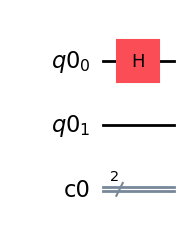

In [6]:
qc.draw('mpl')

In [7]:
qc.draw('text')

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════

To get information about our state we’ll use the qiskit quantum info module from which we’ll import the Statevector object. This allows us to define initial states in many ways and evolve those states according to the given circuit. We can define initial states via. different methods and we’ll demonstrate two of them here. 

In [10]:
from qiskit.quantum_info import Statevector

In [11]:
sv = Statevector.from_label('00')
sv

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


Now I can go with the evolve method to see the circuit outcome. When we do it in this straight-foward way, we see that we get something like an array. But we can also get a prettier print with specifying that we want to use ‘latex’

In [12]:
sv_ev = sv.evolve(qc)
sv_ev.draw()

'Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,\n             0.        +0.j],\n            dims=(2, 2))'

In [13]:
sv_ev.draw('latex')

<IPython.core.display.Latex object>

We've indeed created a product state, as we expected.

**It’s important to note that here we’re not doing any experiments, ie. we’re not sampling from the circuit → we’re just doing deterministic math at the background to get an ideal state that'd be coming from a noiseless circuit and infinitely many shots**

Now let’s create some entanglement. For this we can start with the Bell states. Of course, to entangle two qubits we need them to interact, meaning, we need a two qubit gate in the gate-model. A CNOT conditioned on the superposed qubit will do the job. Let’s do it from scratch. But this time, let’s also add the 2nd argument to the QuantumCircuit to see what we get.

In [14]:
bell_1 = QuantumCircuit(2,2)
bell_1.h(0)
bell_1.cx(0,1)
bell_1.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════

Printing this out, we now have a circuit with 2 qubits but also 2 classical registers. Thus, we see we don't have to explicitly define classical registers.

Let’s now read out the state from our circuit to check if we have created a Bell state. However, this time we’ll use a different method to define a Statevector object. We will use the `from_int` method. We simply tell it the computational state we want at the first argument, and for the second we give it the vector size ie. the dimension of the Hilbert space. Note that in Qiskit, qubit indices start with the least significant bit (qubit 0) and proceed to the most significant bit (highest indexed qubit), which may seem reversed from traditional bit ordering in computer science where the most significant bit is typically on the left. This could be important when working with systems like spin chains, where the physical arrangement and indexing of qubits might affect the interpretation and results of quantum operations. 

In [16]:
sv = Statevector.from_int(0, 2**2)
sv_ev = sv.evolve(bell_1)
sv_ev.draw('latex')

<IPython.core.display.Latex object>

This is the $\Phi^+$ state. We can just use an additional single qubit phase gate to create $\Phi^-$ now. Of course, the phase we want to apply is -1 which means that this phase gate is identical to the Z gate up to a global phase.

In [17]:
bell_2 = QuantumCircuit(2)
bell_2.h(0)
bell_2.z(0)
bell_2.cx(0,1)
bell_2.draw()

┌───┐┌───┐     
q_0: ┤ H ├┤ Z ├──■──
     └───┘└───┘┌─┴─┐
q_1: ──────────┤ X ├
               └───┘

In [18]:
sv = Statevector.from_int(0, 2**2)
sv_ev = sv.evolve(bell_2)
sv_ev.draw('latex')

<IPython.core.display.Latex object>

You can similarly create $\Psi^+$ and $\Psi^-$, then check with the statevector method. I highly encourage you to do it afterwards even if you find it easy.

For the next demonstration, let’s quickly also build a GHZ circuit.

In [19]:
ghz = QuantumCircuit(3)
ghz.h(0)
ghz.cx(0,1)
ghz.cx(0,2)
ghz.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

In [20]:
sv = Statevector.from_label('000')
sv_ghz = sv.evolve(ghz)
sv_ghz.draw('latex')

<IPython.core.display.Latex object>

So far we’ve called the evolved statevector with the draw method either specifying nothing or asking for a ‘latex’ print, but we can also do another thing. We can ask for a qsphere. Now a qsphere is just a representation of multi-qubit states on a Block-sphere like fashion. Here the size of the balls are proportional to the probability of the state and the color is related to the phase. In fact, the Qiskit logo is nothing but a QSphere!

> Note: before continuing, we need to install certain python packages to ensure the qsphere can be plotted as expected.

`pip install matplotlib seaborn pylatexenc`

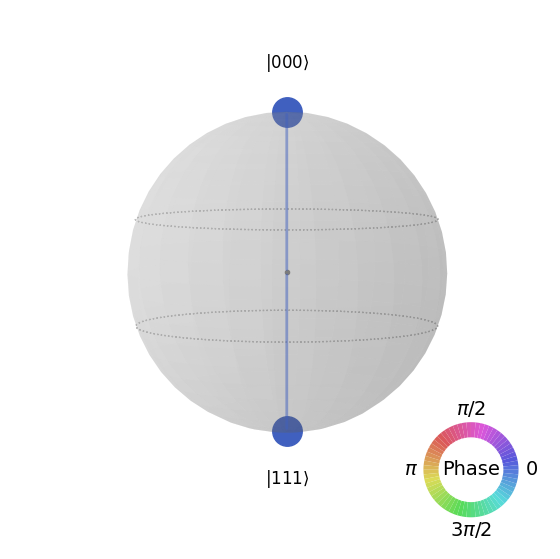

In [21]:
sv_ghz.draw('qsphere')

We can visualize GHZ state using what’s called a hinton plot. This is useful for Density Matrices of mixed states. Hinton diagram represents values of a matrix using squares, the sizes indicate magnitudes and the color, their sign. 

- White -> positive
- Black -> negative

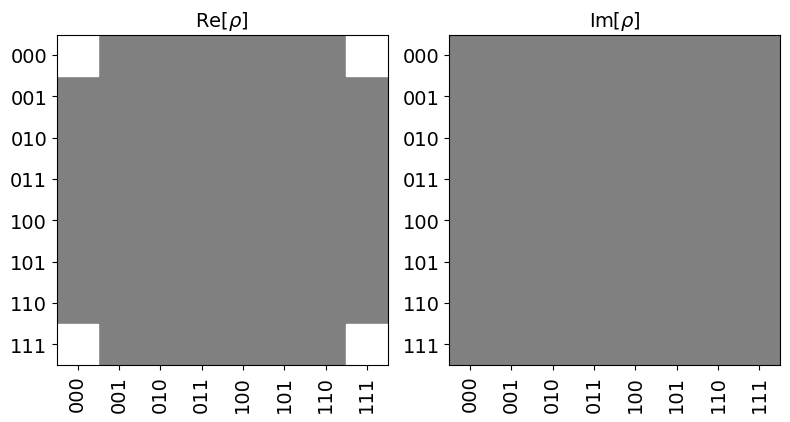

In [22]:
sv_ghz.draw('hinton')

Previously, we have evolved a statevector after initialization. However, the `Statevector` class can also be instantiated by passing a quantum circuit, which effectively "simulates" the evolution assuming all the qubits are in the zero state initially.

In [31]:
state = Statevector(ghz)
print(state)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


Now we can plot the two 3d bar graphs (two dimensional) of the real and imaginary part of the density matrix rho.

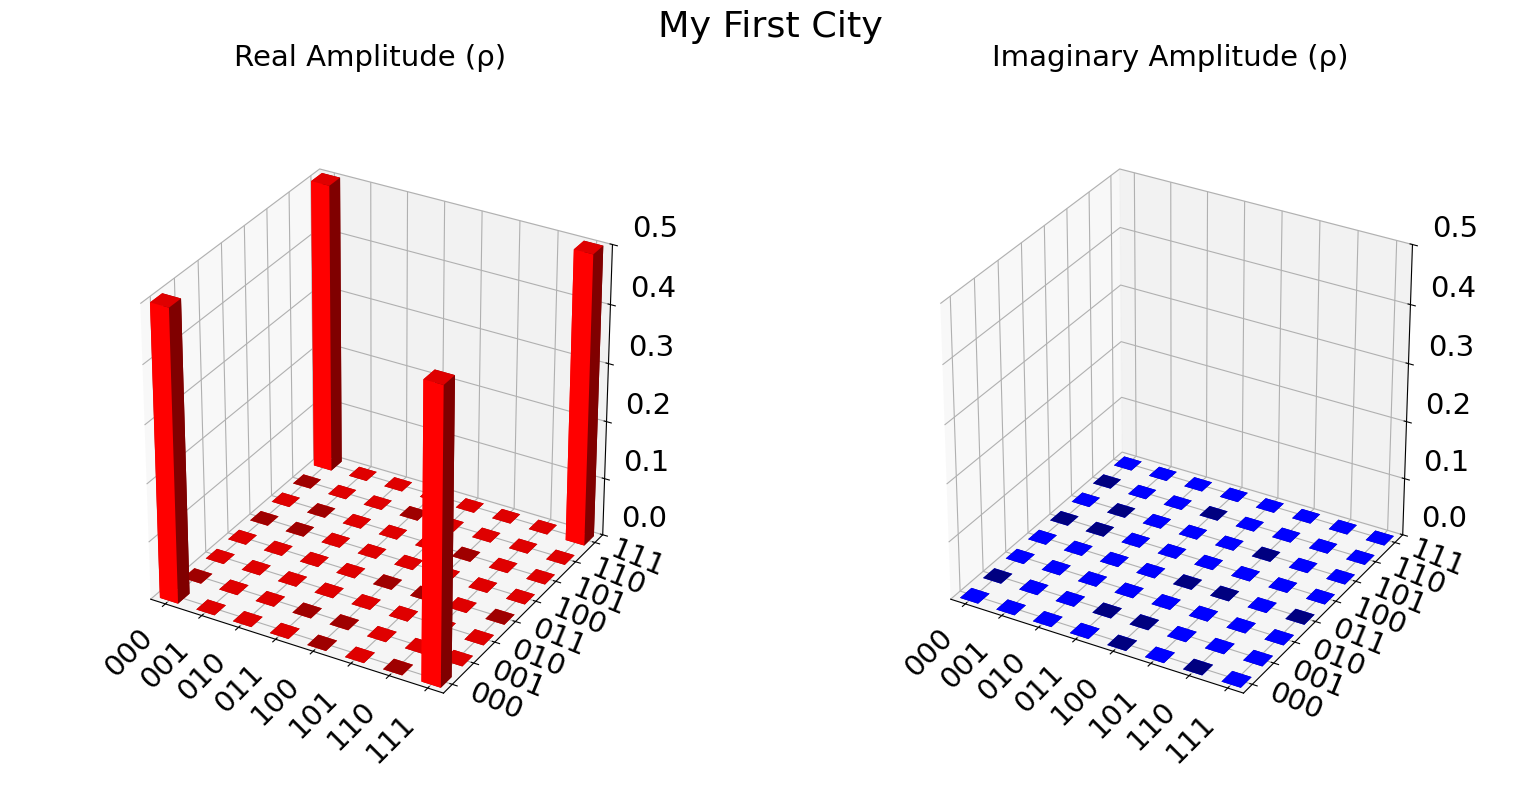

In [32]:
from qiskit.visualization import plot_state_city

plot_state_city(state, title='My First City', color=['red', 'blue'])

Then we plot the state hinton and qsphere

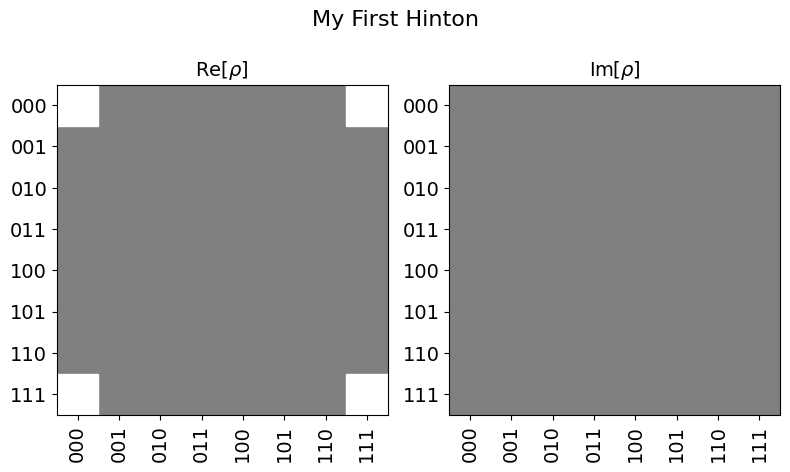

In [33]:
from qiskit.visualization import plot_state_hinton


plot_state_hinton(state, title='My First Hinton')

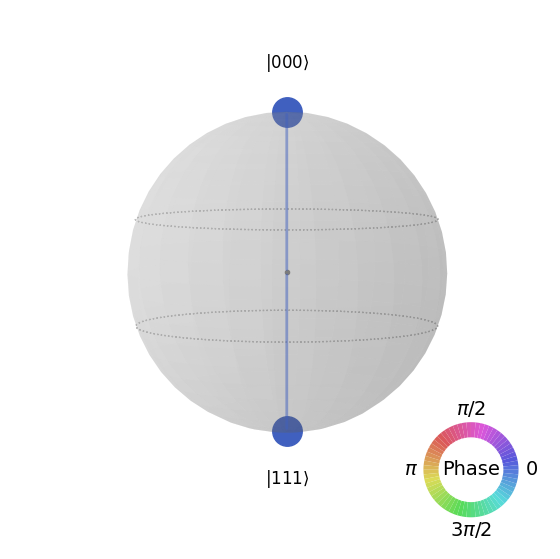

In [34]:
from qiskit.visualization import plot_state_qsphere


plot_state_qsphere(state)

Another useful representation is the Pauli-vector of the evolved state. The following function plots the coefficients $Tr(\rho \sigma)$ for $\sigma$ each of the Pauli operators of the n-Pauli group.

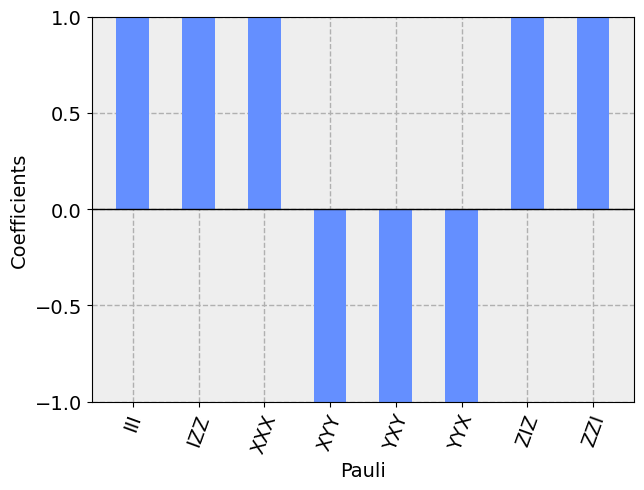

In [35]:
from qiskit.visualization import plot_state_paulivec


plot_state_paulivec(state)

There's yet another visualization function that we can use with the simulators and that is the Bloch Sphere representation for individual qubits. Let us first try it on a new, simple circuit that gives a product state with no entanglement.

In [36]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.x(1)

sv_evo = Statevector(circuit)

circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

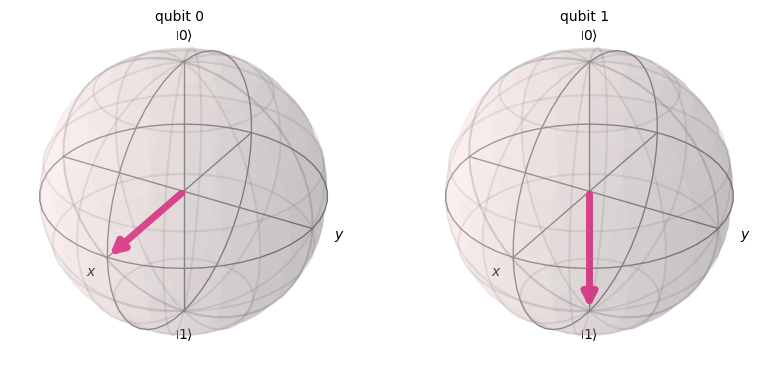

In [37]:
from qiskit.visualization import plot_bloch_multivector

plot_bloch_multivector(sv_evo)

We have seen how it works for a product state, but what if there is entanglement? Moreover, what if the state is a mixed state? For this, we will look at the DensityMatrix object from the quantum_info module.

In [38]:
from qiskit.quantum_info import DensityMatrix

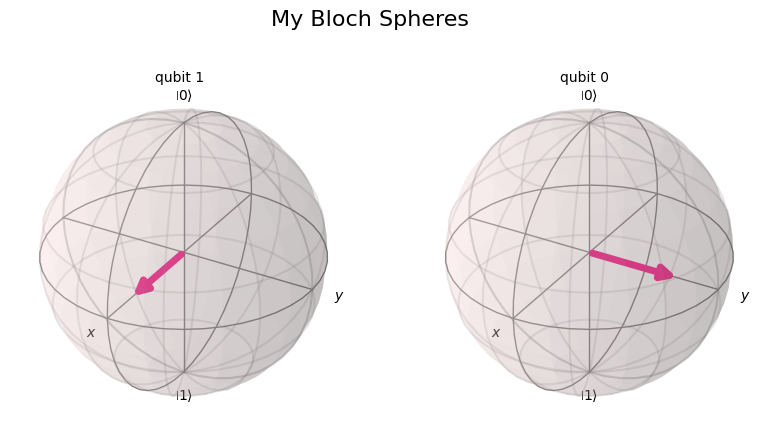

In [39]:
qc = QuantumCircuit(2)
qc.h([0,1])
qc.t(1)
qc.s(0)
qc.cx(0,1)

matrix = DensityMatrix(qc)
plot_bloch_multivector(matrix, title='My Bloch Spheres', reverse_bits = True)

Now you might wonder, how this representation is actually being done. Simply put, each of the (x,y,z) coordinates are coming from expectation values of the single qubit X, Y, Z Pauli operators. So, for example for qubit 1, now on the left, we measure the operator {$I \otimes X, I \otimes Y, I \otimes Z$} and get the expectation values.

Now this was a Bloch sphere representation for things coming out of a circuit. But there is also another function, not the multivector, but simply a plot_bloch_vector and this function takes as input not a circuit, but coordinates directly. 

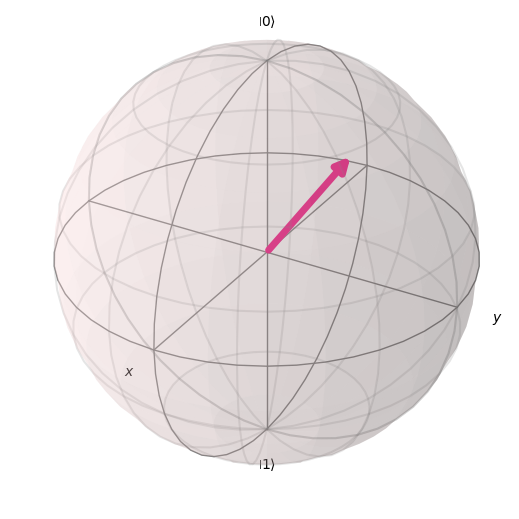

In [40]:
from qiskit.visualization import plot_bloch_vector


plot_bloch_vector([0.1, 0.5, 0.7])

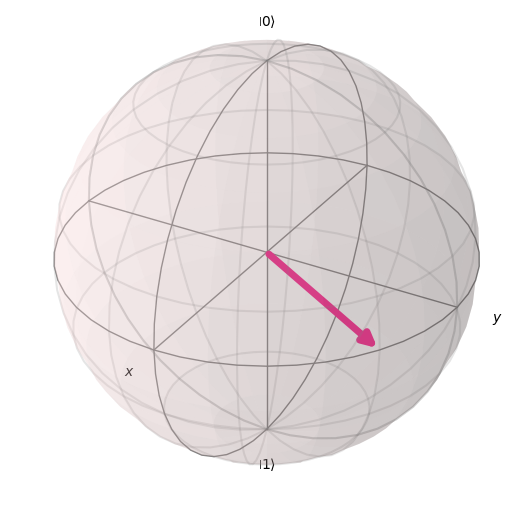

In [41]:
plot_bloch_vector([1, np.pi/2, np.pi/3], coord_type='spherical')

- Demonstration of Grokking the Bloch Sphere for single qubit operations

Until now, we've been dealing with the states, rather than the circuits. But what if we actually wanted to learn more about the circuit itself, or we have a Unitary that we don't know the circuit representation of. Similar to the statevector, we can employ the `quantum_info` module to this end.

In [47]:
qc = QuantumCircuit(4)
qc.h([0,1,2,3])
qc.cx(0,2)
qc.x([1,3])
qc.ry(np.pi/7, 2)
qc.cz([0,1],[2,3])
qc.draw()

┌───┐                      
q_0: ┤ H ├──■─────────────────■─
     ├───┤  │     ┌───┐       │ 
q_1: ┤ H ├──┼─────┤ X ├────■──┼─
     ├───┤┌─┴─┐┌──┴───┴──┐ │  │ 
q_2: ┤ H ├┤ X ├┤ Ry(π/7) ├─┼──■─
     ├───┤├───┤└─────────┘ │    
q_3: ┤ H ├┤ X ├────────────■────
     └───┘└───┘

In [48]:
from qiskit.quantum_info import Operator

In [49]:
U = Operator(qc)
U.data

array([[ 0.18810174+0.j,  0.18810174+0.j, -0.18810174+0.j,
        -0.18810174+0.j,  0.29936221+0.j,  0.29936221+0.j,
        -0.29936221+0.j, -0.29936221+0.j, -0.18810174+0.j,
        -0.18810174+0.j,  0.18810174+0.j,  0.18810174+0.j,
        -0.29936221+0.j, -0.29936221+0.j,  0.29936221+0.j,
         0.29936221+0.j],
       [ 0.18810174+0.j, -0.18810174+0.j, -0.18810174+0.j,
         0.18810174+0.j, -0.29936221+0.j,  0.29936221+0.j,
         0.29936221+0.j, -0.29936221+0.j, -0.18810174+0.j,
         0.18810174+0.j,  0.18810174+0.j, -0.18810174+0.j,
         0.29936221+0.j, -0.29936221+0.j, -0.29936221+0.j,
         0.29936221+0.j],
       [ 0.18810174+0.j,  0.18810174+0.j,  0.18810174+0.j,
         0.18810174+0.j,  0.29936221+0.j,  0.29936221+0.j,
         0.29936221+0.j,  0.29936221+0.j, -0.18810174+0.j,
        -0.18810174+0.j, -0.18810174+0.j, -0.18810174+0.j,
        -0.29936221+0.j, -0.29936221+0.j, -0.29936221+0.j,
        -0.29936221+0.j],
       [ 0.18810174+0.j, -0.18810174+

In [50]:
U.data.shape

(16, 16)

Caution here, as this is the Unitary simulator, it only works with ideal gates and no noise.